En esta sesión, exploraremos la implementación de servicios de Machine Learning utilizando gRPC, GraphQL y REST. Compararemos sus características, ventajas y desventajas en escenarios de MLOps, centrándonos en la performance y la flexibilidad de cada una. La parte práctica se centrará en la implementación de estos servicios y un cliente para probarlos.

# 1. Contenido Teórico

Esta sección se centrará en los fundamentos de gRPC y su comparación con otras tecnologías de comunicación, con un enfoque claro en su aplicación en MLOps.

## 1.1. Introducción a gRPC

**RPC (Remote Procedure Call)**: es un protocolo de comunicación interproceso que permite que un programa de computadora solicite a un programa en otra computadora (en una red compartida) que ejecute un procedimiento (subrutina o función) sin que el programador codifique explícitamente los detalles de la interacción remota. Es decir, un programa cliente realiza una llamada a una función que se ejecuta en un servidor remoto como si fuera una función local.

**Componentes clave de un sistema RPC**:
1. Cliente: El programa que inicia la llamada remota.
2. Stub del cliente: Un código generado automáticamente que actúa como proxy para la función remota en el lado del cliente. Empaqueta los parámetros de la llamada en un formato adecuado para la transmisión (marshalling).
3. Tiempo de ejecución de RPC: Maneja la comunicación entre el cliente y el servidor, incluyendo el envío de la solicitud y la recepción de la respuesta.
4. Stub del servidor: Código generado automáticamente en el lado del servidor que recibe la solicitud, desempaqueta los parámetros (unmarshalling), llama a la función de servicio real y empaqueta el resultado para la transmisión.
5. Servidor: El programa que contiene e implementa la función remota.

**Evolución de RPC**:
Los conceptos de RPC surgieron en la década de 1970. A lo largo de los años, han evolucionado diferentes implementaciones y estándares para abordar desafíos como la serialización de datos, el manejo de errores, la seguridad y la interoperabilidad entre diferentes lenguajes y sistemas operativos. Ejemplos notables incluyen ONC RPC (Sun Microsystems), DCE RPC (Open Group) y, más recientemente, gRPC (Google).

**Por qué sigue siendo relevante en arquitecturas distribuidas**:
A pesar de la popularidad de otros estilos de comunicación como REST, RPC sigue siendo relevante por varias razones, especialmente en arquitecturas distribuidas y microservicios:
- Eficiencia: Las implementaciones modernas de RPC (como gRPC) a menudo utilizan protocolos de transporte eficientes (como HTTP/2) y formatos de serialización binaria (como Protocol Buffers), lo que resulta en menor latencia y menor consumo de ancho de banda en comparación con protocolos basados en texto como JSON sobre HTTP/1.1.
- Tipado fuerte: RPC a menudo utiliza definiciones de interfaz (IDL - Interface Definition Language) que permiten definir de forma precisa los tipos de datos y las firmas de los servicios. Esto facilita la detección temprana de errores en tiempo de compilación y mejora la mantenibilidad.
- Generación de código: Las herramientas de RPC pueden generar automáticamente código boilerplate para clientes y servidores en múltiples lenguajes. Esto reduce la cantidad de código manual necesario y garantiza la coherencia.
- Streaming: Algunas implementaciones de RPC (como gRPC) soportan streaming bidireccional, lo que es útil para casos de uso que requieren la transferencia continua de datos.
- Adecuado para comunicación interna: RPC es particularmente adecuado para la comunicación entre servicios dentro de un mismo centro de datos o entre microservicios donde la eficiencia y el rendimiento son críticos y el control sobre ambos extremos de la comunicación es posible.


**Protocol Buffers**: es un mecanismo de Google para serializar datos estructurados. Es similar a XML o JSON, pero es más pequeño, más rápido y simple. Permite definir la estructura de los datos utilizando un lenguaje de definición de interfaces (IDL) simple en un archivo `.proto`. El compilador de Protocol Buffers (`protoc`) puede generar código fuente para acceder y manipular estos datos en una variedad de lenguajes de programación.

**Conceptos clave:**
- Mensajes: La unidad fundamental en Protocol Buffers es el "mensaje", que es una pequeña estructura de datos lógica que contiene un conjunto de campos tipados.
- Campos: Cada campo tiene un nombre, un tipo (entero, flotante, string, booleano, otros mensajes, etc.) y un número de etiqueta único. El número de etiqueta se utiliza para identificar el campo en el formato binario, lo que permite agregar o eliminar campos sin romper la compatibilidad hacia atrás o hacia adelante.
- Tipos de campos: Protocol Buffers soporta tipos escalares (como `int32`, `string`, `bool`, `float`, `double`), así como tipos compuestos (otros mensajes, enums, listas repetidas).
- Archivos `.proto`: Se utilizan para definir los mensajes y los servicios.
- Compilador `protoc`: Herramienta que toma los archivos `.proto` y genera código fuente en el lenguaje de destino.

Ejemplo simple de un archivo `.proto`:


```
syntax = "proto3"

message Person {
  string name = 1;
  int32 id = 2;
  bool is_student = 3;
}

```
## 1.2. Modelos de Comunicación en gRPC

**Unary RPC**: El modelo de solicitud-respuesta más básico, similar a una llamada de función síncrona.

**Server Streaming RPC**: Una solicitud del cliente resulta en una secuencia de mensajes de respuesta del servidor. Útil para actualizaciones continuas o grandes conjuntos de resultados.

**Client Streaming RPC**: El cliente envía una secuencia de mensajes al servidor, y el servidor envía una única respuesta una vez que ha procesado todos los mensajes del cliente. Útil para enviar grandes flujos de datos al servidor.

**Bidirectional Streaming RPC**: Comunicación bidireccional donde cliente y servidor pueden enviar y recibir una secuencia de mensajes de forma concurrente, manteniendo el orden dentro de cada stream. Ideal para interacciones en tiempo real.

## 1.3 Ventajas de gRPC y Casos de Uso en MLOps

**Eficiencia y Performance**: gRPC utiliza HTTP/2 para multiplexación de solicitudes y compresión de encabezados, y Protocol Buffers para una serialización/deserialización binaria eficiente, lo que se traduce en menor latencia y menor uso de ancho de banda.

**Contrato de Servicio Estricto**: La definición de servicios y mensajes a través de archivos .proto impone un contrato de servicio estricto, facilitando la validación y el mantenimiento de la API, y previniendo errores por inconsistencias de datos.

**Multilenguaje**: El código se puede generar automáticamente para docenas de lenguajes de programación, facilitando la interoperabilidad entre microservicios escritos en diferentes lenguajes.

**Casos de Uso en MLOps:**

**Comunicación interna entre microservicios de ML**: Ideal para el flujo de datos entre un servicio de preprocesamiento, un servicio de inferencia de baja latencia o un orquestador de pipelines.

**Inferencia de baja latencia**: Especialmente útil donde cada milisegundo cuenta.

**Streaming de datos**: Para flujos continuos de datos de telemetría o resultados de inferencia.


## 1.4 Comparación Detallada: REST vs. GraphQL vs. gRPC
Analizaremos comparativamente cada tecnología en términos de:

**Rendimiento y eficiencia**: gRPC > GraphQL > REST (generalmente).

**Facilidad de desarrollo y depuración**: REST (más familiar) > GraphQL (curva de aprendizaje) > gRPC (necesidad de herramientas proto).

**Flexibilidad en el diseño de APIs**: GraphQL (el cliente decide los campos) > REST (endpoints fijos) > gRPC (contrato estricto).

**Soporte para streaming**: gRPC (nativo y robusto) > GraphQL (suscripciones con WebSockets) > REST (Long Polling, SSE).

**Curva de aprendizaje**: REST (baja) < GraphQL (media) < gRPC (alta al inicio por Protocol Buffers).

**Cuándo usar cada tecnología en MLOps:**

**REST**: Para APIs públicas, integración con terceros, o servicios donde la simplicidad y la familiaridad son clave.

**GraphQL**: Cuando los clientes necesitan flexibilidad para solicitar solo los datos que necesitan, evitando over-fetching o under-fetching. Útil en dashboards o aplicaciones front-end complejas.

**gRPC**: Para comunicación interna de microservicios, donde la alta performance, la eficiencia y los contratos de servicio estrictos son críticos, especialmente en pipelines de ML de baja latencia o alto throughput.



# 2. Contenido Práctico

En esta sección, implementaremos un modelo "toy" y crearemos servicios de inferencia utilizando REST, GraphQL y gRPC. Finalmente, construiremos un cliente para interactuar con estos servicios y comparar su rendimiento.

## 2.1. Estructura del Proyecto
Vamos a crear la siguiente estructura de directorios en tu máquina local:


```
ml_services_comparison/
├── docker-compose.yml
├── grpc_service/
│   ├── pyproject.toml
│   ├── poetry.lock
│   ├── main.py
│   ├── model.pkl
│   ├── ml_service_pb2.py      <- Se generará
│   ├── ml_service_pb2_grpc.py <- Se generará
│   └── proto/
│       └── ml_service.proto
├── graphql_service/
│   ├── pyproject.toml
│   ├── poetry.lock
│   ├── main.py
│   └── model.pkl
├── rest_service/
│   ├── pyproject.toml
│   ├── poetry.lock
│   ├── main.py
│   └── model.pkl
└── client/
    ├── pyproject.toml
    ├── poetry.lock
    ├── client.py
    ├── README.md              <- Se creará u omitir en config
    ├── ml_service_pb2.py      <- Se generará
    ├── ml_service_pb2_grpc.py <- Se generará
    └── proto/
        └── ml_service.proto
```



In [1]:
# Crea el directorio del proyecto y navega hacia él
!mkdir ml_services_comparison
%cd ml_services_comparison

# Inicializa el proyecto Poetry (crea pyproject.toml)
!poetry init --no-interaction # --no-interaction para no pedir confirmaciones en notebook

/Users/alejandrolloveras/Documents/ESTUDIO/UBA/Materias/MLOps2/Repo/MLOPs2_2025_UBA/clase4/Practica/ml_services_comparison


In [2]:
# Crea árbol de directorios para los servicios
!mkdir -p grpc_service/proto graphql_service rest_service client/proto

## 2.2. Configuración del Entorno con Docker y Poetry
Utilizaremos Docker para la contenerización y Poetry para la gestión de dependencias.

In [3]:
services = ['grpc_service', 'graphql_service', 'rest_service', 'client']

### 2.2.1. Dockerfiles Base para cada Servicio
Crea un archivo *Dockerfile* dentro de cada uno de los directorios de servicio (g*rpc_service, graphql_service, rest_service, client*). El contenido será muy similar, con una particularidad para *grpc_service* y *client* que veremos más adelante.

*Dockerfile* (para *graphql_service*, *rest_service*, client):



```
FROM python:3.9-slim-buster

WORKDIR /app

# Install Poetry
RUN pip install poetry

# Copy pyproject.toml and poetry.lock to the working directory
COPY pyproject.toml poetry.lock ./

# Install dependencies using Poetry
RUN poetry install --no-root

# Copy the rest of the application code
COPY . .

```



*Dockerfile* (para *grpc_service*):

Este *Dockerfile* incluirá un paso para generar el código gRPC directamente durante la construcción de la imagen.



```
FROM python:3.9-slim-buster

WORKDIR /app

# Install Poetry
RUN pip install poetry

# Copy pyproject.toml and poetry.lock to the working directory
COPY pyproject.toml poetry.lock ./

# Install dependencies using Poetry
RUN poetry install --no-root

# Copy the proto directory
COPY proto ./proto/

# Para gRPC, necesitamos generar el código proto dentro del contenedor
RUN poetry run python -m grpc_tools.protoc -I./proto --python_out=. --grpc_python_out=. ./proto/ml_service.proto

# Copy the rest of the application code
COPY . .
```



In [4]:
extra_content = """
# Copy the proto directory
COPY proto ./proto/

# Para gRPC, necesitamos generar el código proto dentro del contenedor
RUN poetry run python -m grpc_tools.protoc -I./proto --python_out=. --grpc_python_out=. ./proto/ml_service.proto
"""

file_content = lambda content: f"""FROM python:3.9-slim-buster

WORKDIR /app

# Install Poetry
RUN pip install poetry

# Copy pyproject.toml and poetry.lock to the working directory
COPY pyproject.toml poetry.lock ./

# Install dependencies using Poetry
RUN poetry install --no-root
{content}
# Copy the rest of the application code
COPY . ."""

In [5]:
for service in services:
    content = file_content(extra_content) if service == 'client' else file_content('')
    with open(f"{service}/Dockerfile", "w") as f:
        f.write(content)
    print(f'Dockerfile created: {service}/pyproject.toml')

Dockerfile created: grpc_service/pyproject.toml
Dockerfile created: graphql_service/pyproject.toml
Dockerfile created: rest_service/pyproject.toml
Dockerfile created: client/pyproject.toml


In [6]:
%%writefile docker-compose.yml
services:
  grpc_service:
    build:
      context: ./grpc_service
      dockerfile: Dockerfile
    ports:
      - "50051:50051"
    volumes:
      - ./grpc_service:/app
    command: poetry run python main.py

  graphql_service:
    build:
      context: ./graphql_service
      dockerfile: Dockerfile
    ports:
      - "8000:8000"
    volumes:
      - ./graphql_service:/app
    command: poetry run uvicorn main:app --host 0.0.0.0 --port 8000 --reload

  rest_service:
    build:
      context: ./rest_service
      dockerfile: Dockerfile
    ports:
      - "8001:8001"
    volumes:
      - ./rest_service:/app
    command: poetry run uvicorn main:app --host 0.0.0.0 --port 8001 --reload

  client:
    build:
      context: ./client
      dockerfile: Dockerfile
    volumes:
      - ./client:/app
    # El comando para el cliente se ejecutará manualmente desde tu terminal local

Writing docker-compose.yml


### 2.2.2. Configuración *docker-compose.yml*
Crea el archivo *docker-compose.yml* en el directorio raíz *ml_services_comparison*/



```
services:
  grpc_service:
    build:
      context: ./grpc_service
      dockerfile: Dockerfile
    ports:
      - "50051:50051"
    volumes:
      - ./grpc_service:/app
    command: poetry run python main.py

  graphql_service:
    build:
      context: ./graphql_service
      dockerfile: Dockerfile
    ports:
      - "8000:8000"
    volumes:
      - ./graphql_service:/app
    command: poetry run uvicorn main:app --host 0.0.0.0 --port 8000 --reload

  rest_service:
    build:
      context: ./rest_service
      dockerfile: Dockerfile
    ports:
      - "8001:8001"
    volumes:
      - ./rest_service:/app
    command: poetry run uvicorn main:app --host 0.0.0.0 --port 8001 --reload

  client:
    build:
      context: ./client
      dockerfile: Dockerfile
    volumes:
      - ./client:/app
    # El comando para el cliente se ejecutará manualmente desde tu terminal local
```



In [7]:
%%writefile docker-compose.yml
services:
  grpc_service:
    build:
      context: ./grpc_service
      dockerfile: Dockerfile
    ports:
      - "50051:50051"
    volumes:
      - ./grpc_service:/app
    command: poetry run python main.py

  graphql_service:
    build:
      context: ./graphql_service
      dockerfile: Dockerfile
    ports:
      - "8000:8000"
    volumes:
      - ./graphql_service:/app
    command: poetry run uvicorn main:app --host 0.0.0.0 --port 8000 --reload

  rest_service:
    build:
      context: ./rest_service
      dockerfile: Dockerfile
    ports:
      - "8001:8001"
    volumes:
      - ./rest_service:/app
    command: poetry run uvicorn main:app --host 0.0.0.0 --port 8001 --reload

  client:
    build:
      context: ./client
      dockerfile: Dockerfile
    volumes:
      - ./client:/app
    # El comando para el cliente se ejecutará manualmente desde tu terminal local

Overwriting docker-compose.yml


### 2.2.3. Inicialización de Proyectos Poetry y Dependencias
Para cada uno de los directorios (grpc_service, graphql_service, rest_service, client), abre tu terminal, navega a ese directorio y sigue los pasos.

Paso a paso para cada directorio de servicio/cliente:


1.   Navega al directorio del servicio/cliente (ej. *ml_services_comparison/grpc_service/*)


```
cd ml_services_comparison/grpc_service/
```



2. Inicializa el proyecto Poetry:



```
poetry init --no-interaction
```




3. Actualiza el archivo pyproject.toml con las dependencias correctas:

Abre manualmente el archivo pyproject.toml en cada directorio y copia el contenido correspondiente de las siguientes secciones.

*   grpc_service/pyproject.toml:


```
[tool.poetry]
name = "grpc-service"
version = "0.1.0"
description = ""
authors = ["JARS29 <jandresrsalas@gmail.com>"]
readme = "README.md"

[tool.poetry.dependencies]
python = ">=3.9,<3.12"
grpcio = "^1.50.0"
grpcio-tools = "^1.50.0"
scikit-learn = "^1.0.0"

[build-system]
requires = ["poetry-core>=1.0.0"]
build-backend = "poetry.core.masonry.api"
```

*   graphql_service/pyproject.toml:


```
[tool.poetry]
name = "graphql-service"
version = "0.1.0"
description = ""
authors = ["JARS29 <jandresrsalas@gmail.com>"]
readme = "README.md"

[tool.poetry.dependencies]
python = ">=3.9,<3.12"
fastapi = "^0.100.0"
uvicorn = {extras = ["standard"], version = "^0.23.2"}
strawberry-graphql = {extras = ["fastapi"], version = "^0.200.0"}
scikit-learn = "^1.0.0"

[build-system]
requires = ["poetry-core>=1.0.0"]
build-backend = "poetry.core.masonry.api"
```

*   rest_service/pyproject.toml

```
[tool.poetry]
name = "rest-service"
version = "0.1.0"
description = ""
authors = ["JARS29 <jandresrsalas@gmail.com>"]
readme = "README.md"

[tool.poetry.dependencies]
python = ">=3.9,<3.12"
fastapi = "^0.100.0"
uvicorn = {extras = ["standard"], version = "^0.23.2"}
scikit-learn = "^1.0.0"

[build-system]
requires = ["poetry-core>=1.0.0"]
build-backend = "poetry.core.masonry.api"
```

* client/pyproject.toml:

```
[tool.poetry]
name = "client"
version = "0.1.0"
description = ""
authors = ["JARS29 <jandresrsalas@gmail.com>"]
readme = "README.md" # Puedes eliminar esta línea si no quieres un README para el cliente

[tool.poetry.dependencies]
python = ">=3.9,<3.12"
grpcio = "^1.50.0"
grpcio-tools = "^1.50.0"
requests = "^2.30.0"
httpx = "^0.24.0"
numpy = "^1.23.0" # ¡Añadido!

[build-system]
requires = ["poetry-core>=1.0.0"]
build-backend = "poetry.core.masonry.api"
```

4. Genera el archivo poetry.lock e instala las dependencias localmente:

Después de actualizar el pyproject.toml de cada directorio, ejecuta:



```
poetry lock
```


```
poetry install
```


Estos comandos crearán el archivo poetry.lock (necesario para Docker) e instalará las dependencias en el entorno virtual de Poetry en tu máquina local, respectivamente.


5. Crea el archivo README.md para el cliente (si lo mantuviste en pyproject.toml):
Si no eliminaste la línea readme = "README.md" del client/pyproject.toml, crea un archivo vacío llamado README.md en el directorio client/.
Desde la terminal, dentro de client/:



```
type nul > README.md  # En Windows
# o
touch README.md      # En Linux/macOS

```



In [8]:
toml_files = {
    'grpc_service': """[tool.poetry]
name = "grpc-service"
version = "0.1.0"
description = ""
authors = ["JARS29 <jandresrsalas@gmail.com>"]
readme = "README.md"

[tool.poetry.dependencies]
python = ">=3.9,<3.12"
grpcio = "^1.50.0"
grpcio-tools = "^1.50.0"
scikit-learn = "^1.0.0"

[build-system]
requires = ["poetry-core>=1.0.0"]
build-backend = "poetry.core.masonry.api"
""",
    'graphql_service': """[tool.poetry]
name = "graphql-service"
version = "0.1.0"
description = ""
authors = ["JARS29 <jandresrsalas@gmail.com>"]
readme = "README.md"

[tool.poetry.dependencies]
python = ">=3.9,<3.12"
fastapi = "^0.100.0"
uvicorn = {extras = ["standard"], version = "^0.23.2"}
strawberry-graphql = {extras = ["fastapi"], version = "^0.200.0"}
scikit-learn = "^1.0.0"

[build-system]
requires = ["poetry-core>=1.0.0"]
build-backend = "poetry.core.masonry.api"
""",
    'rest_service': """[tool.poetry]
name = "rest-service"
version = "0.1.0"
description = ""
authors = ["JARS29 <jandresrsalas@gmail.com>"]
readme = "README.md"

[tool.poetry.dependencies]
python = ">=3.9,<3.12"
fastapi = "^0.100.0"
uvicorn = {extras = ["standard"], version = "^0.23.2"}
scikit-learn = "^1.0.0"

[build-system]
requires = ["poetry-core>=1.0.0"]
build-backend = "poetry.core.masonry.api"
""",
    'client': """[tool.poetry]
name = "client"
version = "0.1.0"
description = ""
authors = ["JARS29 <jandresrsalas@gmail.com>"]
readme = "README.md"

[tool.poetry.dependencies]
python = ">=3.9,<3.12"
grpcio = "^1.50.0"
grpcio-tools = "^1.50.0"
requests = "^2.30.0"
httpx = "^0.24.0"
numpy = "^1.23.0"

[build-system]
requires = ["poetry-core>=1.0.0"]
build-backend = "poetry.core.masonry.api"
"""
}

In [9]:
import os

# Get the original directory to return to later
original_dir = os.getcwd()
print(f'Original Directory: {original_dir}')

Original Directory: /Users/alejandrolloveras/Documents/ESTUDIO/UBA/Materias/MLOps2/Repo/MLOPs2_2025_UBA/clase4/Practica/ml_services_comparison


In [10]:
for service in services:
    # Use os.chdir() to change the directory of the Python process
    os.chdir(service)
    print(f'Directory: {os.path.basename(os.getcwd())}')

    # Now all subsequent commands will run from the new directory
    !poetry init --no-interaction
    print(f'Poetry initialized: {service}/pyproject.toml')
    with open("pyproject.toml", "w") as f:
        f.write(toml_files[service])
    print(f'Poetry file written: {service}/pyproject.toml')
    !poetry lock
    !poetry install --no-root
    print(f'Dependencies installed: {service}/.venv')
    
    if service == 'client':
        !touch README.md
        print(f'Empty README.md created: {service}/README.md')
    
    # Change back to the original directory
    os.chdir(original_dir)
    print('---'*20)

Directory: grpc_service
Poetry initialized: grpc_service/pyproject.toml
Poetry file written: grpc_service/pyproject.toml
Updating dependencies
Resolving dependencies... (2.7s)

Writing lock file
Installing dependencies from lock file

No dependencies to install or update
Dependencies installed: grpc_service/.venv
------------------------------------------------------------
Directory: graphql_service
Poetry initialized: graphql_service/pyproject.toml
Poetry file written: graphql_service/pyproject.toml
Updating dependencies
Resolving dependencies... (2.4s)

Writing lock file
Installing dependencies from lock file

No dependencies to install or update
Dependencies installed: graphql_service/.venv
------------------------------------------------------------
Directory: rest_service
Poetry initialized: rest_service/pyproject.toml
Poetry file written: rest_service/pyproject.toml
Updating dependencies
Resolving dependencies... (1.5s)

Writing lock file
Installing dependencies from lock file

N

## 2.3 Modelo "Toy" classificación

Utilizaremos un modelo de clasificación LogisticRegression de Scikit-learn entrenado con el dataset Iris.

*common_model.py*



```
import joblib
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

def train_and_save_model():
    iris = load_iris()
    X, y = iris.data, iris.target
    model = LogisticRegression(max_iter=200)
    model.fit(X, y)
    joblib.dump(model, 'model.pkl')
    print("Modelo entrenado y guardado como model.pkl")

if __name__ == '__main__':
    train_and_save_model()
```



 Ejecuta este script una vez en la raíz de cada directorio de servicio (*grpc_service/, graphql_service/, rest_service/*) para generar el archivo model.pkl.

Alternativamente:



```
# Ejemplo para grpc_service:
cd ml_services_comparison/grpc_service/
python -c "import joblib; from sklearn.datasets import load_iris; from sklearn.linear_model import LogisticRegression; iris = load_iris(); X, y = iris.data, iris.target; model = LogisticRegression(max_iter=200); model.fit(X, y); joblib.dump(model, 'model.pkl'); print('Modelo entrenado y guardado como model.pkl')"
# Haz lo mismo para graphql_service/ y rest_service/
```


Nota: El comando python -c "..." ejecuta el código directamente sin necesidad de crear el archivo common_model.py explícitamente en cada carpeta, aunque tener el archivo common_model.py es también válido si prefieres


In [11]:
# Descarga el modelo preentrenado
!python -c "import joblib; from sklearn.datasets import load_iris; from sklearn.linear_model import LogisticRegression; iris = load_iris(); X, y = iris.data, iris.target; model = LogisticRegression(max_iter=200); model.fit(X, y); joblib.dump(model, 'model.pkl'); print('Modelo entrenado y guardado como model.pkl')"
# Copia el modelo a cada servicio
for service in ['grpc_service', 'graphql_service', 'rest_service']:
    !cp model.pkl {service}/model.pkl
    print(f'Modelo copiado en: {service}/model.pkl')
# Elimina el original
!rm model.pkl

Modelo entrenado y guardado como model.pkl
Modelo copiado en: grpc_service/model.pkl
Modelo copiado en: graphql_service/model.pkl
Modelo copiado en: rest_service/model.pkl


## 2.4 Implementación de los Servicios

### 2.4.1 GRPC Service (*grpc_service/*)

#### 2.4.1.1 Definición del *.proto*  *grpc_service/proto/ml_service.proto*

Crea la carpeta llamada "proto" dentro de *grpc_service*/ y el archivo *ml_service.proto* dentro



```
syntax = "proto3";

package ml_service;

message Feature {
  repeated float values = 1;
}

message Prediction {
  int32 class_id = 1;
}

service MLService {
  rpc Predict (Feature) returns (Prediction);
}
```

In [12]:
%%writefile grpc_service/proto/ml_service.proto
syntax = "proto3";

package ml_service;

message Feature {
  repeated float values = 1;
}

message Prediction {
  int32 class_id = 1;
}

service MLService {
  rpc Predict (Feature) returns (Prediction);
}

Writing grpc_service/proto/ml_service.proto


#### 2.4.1.2. Implementación del servidor (*grpc_service/main.py*)

```
import grpc
from concurrent import futures
import joblib
import ml_service_pb2
import ml_service_pb2_grpc
import numpy as np
import os

MODEL_PATH = os.path.join(os.path.dirname(__file__), 'model.pkl')

class MLServiceServicer(ml_service_pb2_grpc.MLServiceServicer):
    def __init__(self):
        try:
            self.model = joblib.load(MODEL_PATH)
            print(f"Modelo cargado desde {MODEL_PATH}")
        except FileNotFoundError:
            print(f"Error: No se encontró el modelo en {MODEL_PATH}. Asegúrate de haberlo entrenado y guardado.")
            self.model = None

    def Predict(self, request, context):
        if self.model is None:
            context.set_details("Modelo no cargado")
            context.set_code(grpc.StatusCode.UNAVAILABLE)
            return ml_service_pb2.Prediction()

        features = np.array(request.values).reshape(1, -1)
        prediction = self.model.predict(features)[0]
        return ml_service_pb2.Prediction(class_id=int(prediction))

def serve():
    server = grpc.server(futures.ThreadPoolExecutor(max_workers=10))
    ml_service_pb2_grpc.add_MLServiceServicer_to_server(MLServiceServicer(), server)
    server.add_insecure_port('[::]:50051')
    server.start()
    print("Servidor gRPC escuchando en el puerto 50051...")
    server.wait_for_termination()

if __name__ == '__main__':
    serve()
```

In [13]:
%%writefile grpc_service/main.py
import grpc
from concurrent import futures
import joblib
import ml_service_pb2
import ml_service_pb2_grpc
import numpy as np
import os

MODEL_PATH = os.path.join(os.path.dirname(__file__), 'model.pkl')

class MLServiceServicer(ml_service_pb2_grpc.MLServiceServicer):
    def __init__(self):
        try:
            self.model = joblib.load(MODEL_PATH)
            print(f"Modelo cargado desde {MODEL_PATH}")
        except FileNotFoundError:
            print(f"Error: No se encontró el modelo en {MODEL_PATH}. Asegúrate de haberlo entrenado y guardado.")
            self.model = None

    def Predict(self, request, context):
        if self.model is None:
            context.set_details("Modelo no cargado")
            context.set_code(grpc.StatusCode.UNAVAILABLE)
            return ml_service_pb2.Prediction()

        features = np.array(request.values).reshape(1, -1)
        prediction = self.model.predict(features)[0]
        return ml_service_pb2.Prediction(class_id=int(prediction))

def serve():
    server = grpc.server(futures.ThreadPoolExecutor(max_workers=10))
    ml_service_pb2_grpc.add_MLServiceServicer_to_server(MLServiceServicer(), server)
    server.add_insecure_port('[::]:50051')
    server.start()
    print("Servidor gRPC escuchando en el puerto 50051...")
    server.wait_for_termination()

if __name__ == '__main__':
    serve()

Writing grpc_service/main.py


### 2.4.2. GraphQL Service (*graphql_service/main.py*)

```
from fastapi import FastAPI
import strawberry
from strawberry.fastapi import GraphQLRouter
import joblib
import numpy as np
import os

MODEL_PATH = os.path.join(os.path.dirname(__file__), 'model.pkl')
model = joblib.load(MODEL_PATH)

@strawberry.type
class Prediction:
    class_id: int

@strawberry.type
class Query:
    @strawberry.field
    def predict(self, features: list[float]) -> Prediction:
        input_features = np.array(features).reshape(1, -1)
        prediction = model.predict(input_features)[0]
        return Prediction(class_id=int(prediction))

schema = strawberry.Schema(query=Query)
graphql_app = GraphQLRouter(schema)

app = FastAPI()
app.include_router(graphql_app, prefix="/graphql")

@app.get("/")
def read_root():
    return {"message": "GraphQL ML Service is running. Access /graphql"}

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000)
    
```

In [14]:
%%writefile graphql_service/main.py
from fastapi import FastAPI
import strawberry
from strawberry.fastapi import GraphQLRouter
import joblib
import numpy as np
import os

MODEL_PATH = os.path.join(os.path.dirname(__file__), 'model.pkl')
model = joblib.load(MODEL_PATH)

@strawberry.type
class Prediction:
    class_id: int

@strawberry.type
class Query:
    @strawberry.field
    def predict(self, features: list[float]) -> Prediction:
        input_features = np.array(features).reshape(1, -1)
        prediction = model.predict(input_features)[0]
        return Prediction(class_id=int(prediction))

schema = strawberry.Schema(query=Query)
graphql_app = GraphQLRouter(schema)

app = FastAPI()
app.include_router(graphql_app, prefix="/graphql")

@app.get("/")
def read_root():
    return {"message": "GraphQL ML Service is running. Access /graphql"}

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000)

Writing graphql_service/main.py


### 2.4.3. REST Service (rest_service/main.py)

```
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np
import os

MODEL_PATH = os.path.join(os.path.dirname(__file__), 'model.pkl')
model = joblib.load(MODEL_PATH)

class Features(BaseModel):
    values: list[float]

app = FastAPI()

@app.post("/predict")
def predict(features: Features):
    input_features = np.array(features.values).reshape(1, -1)
    prediction = model.predict(input_features)[0]
    return {"class_id": int(prediction)}

@app.get("/")
def read_root():
    return {"message": "REST ML Service is running. Post to /predict"}

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8001)
    
```

In [15]:
%%writefile rest_service/main.py
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np
import os

MODEL_PATH = os.path.join(os.path.dirname(__file__), 'model.pkl')
model = joblib.load(MODEL_PATH)

class Features(BaseModel):
    values: list[float]

app = FastAPI()

@app.post("/predict")
def predict(features: Features):
    input_features = np.array(features.values).reshape(1, -1)
    prediction = model.predict(input_features)[0]
    return {"class_id": int(prediction)}

@app.get("/")
def read_root():
    return {"message": "REST ML Service is running. Post to /predict"}

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8001)
    

Writing rest_service/main.py


In [16]:
!pwd

/Users/alejandrolloveras/Documents/ESTUDIO/UBA/Materias/MLOps2/Repo/MLOPs2_2025_UBA/clase4/Practica/ml_services_comparison


## 2.5 Ejecutar los Servicios con Docker Compose

Desde la raíz de tu proyecto (*ml_services_comparison/*), abre una terminal y ejecuta:



```
docker-compose up --build -d
```





In [17]:
!pwd # Verificar que sea el directorio raíz
# !docker-compose up --build -d

/Users/alejandrolloveras/Documents/ESTUDIO/UBA/Materias/MLOps2/Repo/MLOPs2_2025_UBA/clase4/Practica/ml_services_comparison


Esto construirá las imágenes Docker (incluyendo la generación de archivos proto para gRPC) y levantará los tres servicios en segundo plano.

Puedes verificar que los contenedores están corriendo con:



```
docker-compose ps
```



In [18]:
# !docker-compose ps

## 2.6 Implementación y Ejecución del Cliente (client/client.py)

El cliente necesitará sus propias definiciones gRPC generadas para comunicarse con el servicio gRPC.



1.   Copia el archivo *.proto* al directorio *client/proto/*
Asegúrate de que el archivo *ml_service.proto* se encuentre en *ml_services_comparison/client/proto/*.
2.   Crear el archivo *client.py* (en *ml_services_comparison/client*), con el siguiente contenido:



```
import grpc
import requests
import json
import time
import numpy as np
import ml_service_pb2 # Este archivo será generado
import ml_service_pb2_grpc # Este archivo será generado

# Configuración
GRPC_HOST = "localhost:50051"
GRAPHQL_URL = "http://localhost:8000/graphql"
REST_URL = "http://localhost:8001/predict"
NUM_REQUESTS = 1000 # Número de solicitudes para la prueba de rendimiento
EXAMPLE_FEATURES = [5.1, 3.5, 1.4, 0.2] # Ejemplo para el dataset Iris

# --- gRPC Client ---
def run_grpc_client():
    start_time = time.time()
    with grpc.insecure_channel(GRPC_HOST) as channel:
        stub = ml_service_pb2_grpc.MLServiceStub(channel)
        for _ in range(NUM_REQUESTS):
            request = ml_service_pb2.Feature(values=EXAMPLE_FEATURES)
            response = stub.Predict(request)
            # print(f"gRPC Prediction: {response.class_id}")
    end_time = time.time()
    return end_time - start_time

# --- GraphQL Client ---
def run_graphql_client():
    start_time = time.time()
    query = """
    query Predict($features: [Float!]!) {
      predict(features: $features) {
        class_id
      }
    }
    """
    headers = {"Content-Type": "application/json"}
    for _ in range(NUM_REQUESTS):
        payload = {
            "query": query,
            "variables": {"features": EXAMPLE_FEATURES}
        }
        response = requests.post(GRAPHQL_URL, headers=headers, data=json.dumps(payload))
        response.raise_for_status() # Lanza una excepción si la respuesta no es 2xx
        # print(f"GraphQL Prediction: {response.json()['data']['predict']['class_id']}")
    end_time = time.time()
    return end_time - start_time

# --- REST Client ---
def run_rest_client():
    start_time = time.time()
    headers = {"Content-Type": "application/json"}
    for _ in range(NUM_REQUESTS):
        payload = {"values": EXAMPLE_FEATURES}
        response = requests.post(REST_URL, headers=headers, data=json.dumps(payload))
        response.raise_for_status() # Lanza una excepción si la respuesta no es 2xx
        # print(f"REST Prediction: {response.json()['class_id']}")
    end_time = time.time()
    return end_time - start_time

if __name__ == "__main__":
    print(f"Realizando {NUM_REQUESTS} solicitudes a cada servicio con features: {EXAMPLE_FEATURES}")

    print("\n--- Probando gRPC ---")
    grpc_time = run_grpc_client()
    print(f"Tiempo total gRPC: {grpc_time:.4f} segundos")
    print(f"Tiempo promedio por solicitud gRPC: {grpc_time / NUM_REQUESTS * 1000:.4f} ms")

    print("\n--- Probando GraphQL ---")
    graphql_time = run_graphql_client()
    print(f"Tiempo total GraphQL: {graphql_time:.4f} segundos")
    print(f"Tiempo promedio por solicitud GraphQL: {graphql_time / NUM_REQUESTS * 1000:.4f} ms")

    print("\n--- Probando REST ---")
    rest_time = run_rest_client()
    print(f"Tiempo total REST: {rest_time:.4f} segundos")
    print(f"Tiempo promedio por solicitud REST: {rest_time / NUM_REQUESTS * 1000:.4f} ms")

    print("\n--- Resumen de Tiempos ---")
    print(f"gRPC: {grpc_time:.4f} s")
    print(f"GraphQL: {graphql_time:.4f} s")
    print(f"REST: {rest_time:.4f} s")
    
```

In [19]:
!cp grpc_service/proto/ml_service.proto client/proto/ml_service.proto 

In [20]:
%%writefile client/client.py
import grpc
import requests
import json
import time
import numpy as np
import ml_service_pb2 # Este archivo será generado
import ml_service_pb2_grpc # Este archivo será generado

# Configuración
GRPC_HOST = "localhost:50051"
GRAPHQL_URL = "http://localhost:8000/graphql"
REST_URL = "http://localhost:8001/predict"
NUM_REQUESTS = 1000 # Número de solicitudes para la prueba de rendimiento
EXAMPLE_FEATURES = [5.1, 3.5, 1.4, 0.2] # Ejemplo para el dataset Iris

# --- gRPC Client ---
def run_grpc_client():
    start_time = time.time()
    with grpc.insecure_channel(GRPC_HOST) as channel:
        stub = ml_service_pb2_grpc.MLServiceStub(channel)
        for _ in range(NUM_REQUESTS):
            request = ml_service_pb2.Feature(values=EXAMPLE_FEATURES)
            response = stub.Predict(request)
            # print(f"gRPC Prediction: {response.class_id}")
    end_time = time.time()
    return end_time - start_time

# --- GraphQL Client ---
def run_graphql_client():
    start_time = time.time()
    query = """
    query Predict($features: [Float!]!) {
      predict(features: $features) {
        class_id
      }
    }
    """
    headers = {"Content-Type": "application/json"}
    for _ in range(NUM_REQUESTS):
        payload = {
            "query": query,
            "variables": {"features": EXAMPLE_FEATURES}
        }
        response = requests.post(GRAPHQL_URL, headers=headers, data=json.dumps(payload))
        response.raise_for_status() # Lanza una excepción si la respuesta no es 2xx
        # print(f"GraphQL Prediction: {response.json()['data']['predict']['class_id']}")
    end_time = time.time()
    return end_time - start_time

# --- REST Client ---
def run_rest_client():
    start_time = time.time()
    headers = {"Content-Type": "application/json"}
    for _ in range(NUM_REQUESTS):
        payload = {"values": EXAMPLE_FEATURES}
        response = requests.post(REST_URL, headers=headers, data=json.dumps(payload))
        response.raise_for_status() # Lanza una excepción si la respuesta no es 2xx
        # print(f"REST Prediction: {response.json()['class_id']}")
    end_time = time.time()
    return end_time - start_time

if __name__ == "__main__":
    print(f"Realizando {NUM_REQUESTS} solicitudes a cada servicio con features: {EXAMPLE_FEATURES}")

    print("\n--- Probando gRPC ---")
    grpc_time = run_grpc_client()
    print(f"Tiempo total gRPC: {grpc_time:.4f} segundos")
    print(f"Tiempo promedio por solicitud gRPC: {grpc_time / NUM_REQUESTS * 1000:.4f} ms")

    print("\n--- Probando GraphQL ---")
    graphql_time = run_graphql_client()
    print(f"Tiempo total GraphQL: {graphql_time:.4f} segundos")
    print(f"Tiempo promedio por solicitud GraphQL: {graphql_time / NUM_REQUESTS * 1000:.4f} ms")

    print("\n--- Probando REST ---")
    rest_time = run_rest_client()
    print(f"Tiempo total REST: {rest_time:.4f} segundos")
    print(f"Tiempo promedio por solicitud REST: {rest_time / NUM_REQUESTS * 1000:.4f} ms")

    print("\n--- Resumen de Tiempos ---")
    print(f"gRPC: {grpc_time:.4f} s")
    print(f"GraphQL: {graphql_time:.4f} s")
    print(f"REST: {rest_time:.4f} s")
    

Writing client/client.py




3.   Generar el código gRPC para el cliente (localmente)

Abre tu terminal, navega al directorio *client/* y ejecuta el comando para generar los archivos Python de gRPC:



```
poetry run python -m grpc_tools.protoc -I./proto --python_out=. --grpc_python_out=. ./proto/ml_service.proto
```

Esto creará *ml_service_pb2.py* y *ml_service_pb2_grpc.py* en el directorio *client/*.



4.   Ejecuta el cliente localmente asegurándote de que los servicios Docker están activos, y desde el mismo directorio *client/*, ejecuta:

```
poetry run python ./client.py
```


In [22]:
service = 'client/'
# Use os.chdir() to change the directory of the Python process
os.chdir(service)
print(f'Directory: {os.path.basename(os.getcwd())}')

# Now all subsequent commands will run from the new directory
!poetry run python -m grpc_tools.protoc -I./proto --python_out=. --grpc_python_out=. ./proto/ml_service.proto
print(f'Python files created in: {service}')

!poetry run python ./client.py
print(f'Client executed: {service}client.py')

# Change back to the original directory
os.chdir(original_dir)
print('---'*20)
!pwd

Directory: client
Python files created in: client/
Realizando 1000 solicitudes a cada servicio con features: [5.1, 3.5, 1.4, 0.2]

--- Probando gRPC ---
Traceback (most recent call last):
  File "/Users/alejandrolloveras/Documents/ESTUDIO/UBA/Materias/MLOps2/Repo/MLOPs2_2025_UBA/clase4/Practica/ml_services_comparison/client/./client.py", line 66, in <module>
    grpc_time = run_grpc_client()
                ^^^^^^^^^^^^^^^^^
  File "/Users/alejandrolloveras/Documents/ESTUDIO/UBA/Materias/MLOps2/Repo/MLOPs2_2025_UBA/clase4/Practica/ml_services_comparison/client/./client.py", line 23, in run_grpc_client
    response = stub.Predict(request)
               ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alejandrolloveras/Library/Caches/pypoetry/virtualenvs/client-dveU2bOw-py3.11/lib/python3.11/site-packages/grpc/_channel.py", line 1181, in __call__
    return _end_unary_response_blocking(state, call, False, None)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/alejand

Salida esperada:

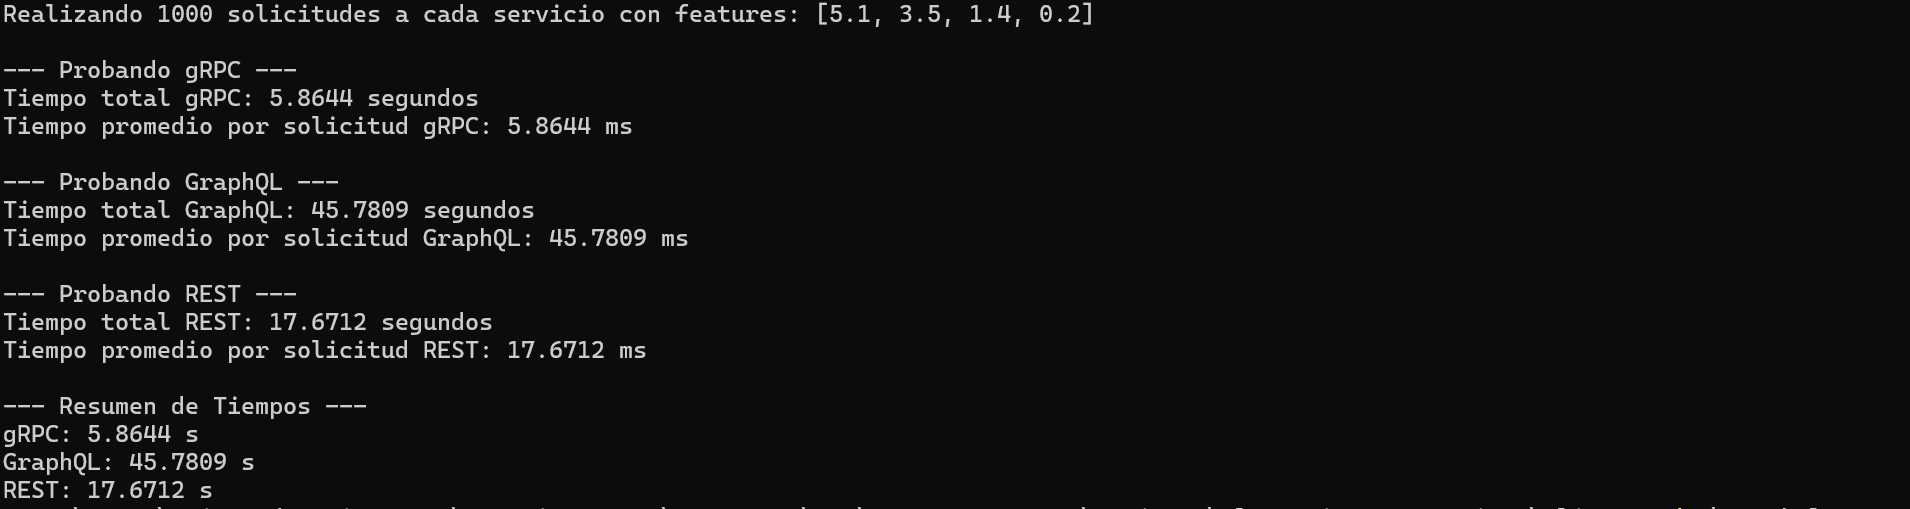

---

In [ ]:
!pwd # Verificar que sea el directorio raíz
!docker-compose up --build -d

/Users/alejandrolloveras/Documents/ESTUDIO/UBA/Materias/MLOps2/Repo/MLOPs2_2025_UBA/clase4/Practica/ml_services_comparison
[+] Running 0/0
 ⠋ Service client           Building                                       0.0s 
 ⠋ Service graphql_service  Building                                       0.0s 
 ⠋ Service grpc_service     Building                                       0.0s 
 ⠋ Service rest_service     Building                                       0.0s 
[+] Running 0/4
 ⠙ Service client           Building                                       0.1s 
 ⠙ Service graphql_service  Building                                       0.1s 
 ⠙ Service grpc_service     Building                                       0.1s 
 ⠙ Service rest_service     Building                                       0.1s 
[+] Building 0.0s (0/0)  docker:desktop-linux
[+] Running 0/4
 ⠹ Service client           Building                                       0.2s 
 ⠹ Service graphql_service  Building                  

Esto construirá las imágenes Docker (incluyendo la generación de archivos proto para gRPC) y levantará los tres servicios en segundo plano.

Puedes verificar que los contenedores están corriendo con:



```
docker-compose ps
```



In [ ]:
!docker-compose ps

NAME                                       IMAGE                                    COMMAND                  SERVICE           CREATED          STATUS          PORTS
ml_services_comparison-graphql_service-1   ml_services_comparison-graphql_service   "poetry run uvicorn …"   graphql_service   19 seconds ago   Up 17 seconds   0.0.0.0:8000->8000/tcp
ml_services_comparison-rest_service-1      ml_services_comparison-rest_service      "poetry run uvicorn …"   rest_service      19 seconds ago   Up 17 seconds   0.0.0.0:8001->8001/tcp


---

## 2.7 Análisis de Resultados y Conclusiones
Observa los tiempos reportados en la terminal para cada tipo de servicio.

**Tiempos de latencia**: En general, gRPC debería mostrar los tiempos más bajos debido a su eficiencia en la serialización (Protocol Buffers) y el protocolo de transporte (HTTP/2). GraphQL y REST, al usar JSON y HTTP/1.1 (o HTTP/2 en REST si está configurado), suelen tener una sobrecarga mayor.

**Facilidad de implementación**: REST es a menudo percibido como el más sencillo de implementar para APIs básicas. GraphQL introduce más complejidad en el servidor (definición de esquemas) pero simplifica la lógica del cliente. gRPC requiere un paso de compilación y tiene una curva de aprendizaje inicial con Protocol Buffers, pero ofrece un contrato de API muy robusto.

**Flexibilidad**: GraphQL ofrece la mayor flexibilidad al cliente para solicitar exactamente los datos que necesita, lo que puede ser crucial en aplicaciones front-end. REST ofrece flexibilidad a nivel de recursos. gRPC es más rígido debido a su contrato estricto, pero esto es una ventaja para la comunicación interna entre microservicios.

**Casos de uso recomendados:**

**REST**: APIs públicas, integración con terceros, o servicios web sencillos.

**GraphQL**: APIs donde los clientes necesitan gran flexibilidad en la forma de consultar los datos, o para agregar múltiples fuentes de datos.

**gRPC**: Comunicación de alto rendimiento entre microservicios, inferencia de baja latencia en MLOps, streaming de datos, o cuando se necesita interoperabilidad entre diferentes lenguajes de programación.

## 2.8 Limpieza

Para detener y remover los contenedores de Docker después de terminar la práctica:


**en la carpeta raiz**
```
docker-compose down
```

